In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='/Users/onehero/Desktop/NanumBarunGothic.ttf').get_name()

rc('font', family = font_name)


In [202]:
price_202001 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 1월 참가격 가격정보_제주도.csv")
price_202001.head()
#소비자 심리지수, 
# 회나 특정 물품만 올랐을 것이다. 
# 가격이 오른 물품, 그것들을 우선 추출을 하자. 


(402, 13)

In [208]:
#price_202002 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 2월 참가격 가격정보_제주도.csv")
price_202003 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 3월 참가격 가격정보_제주도.csv")
price_202004 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 4월 참가격 가격정보_제주도.csv")
price_202005 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 5월 참가격 가격정보_제주도.csv")
price_202006 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 6월 참가격 가격정보_제주도.csv")
price_202007 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 7월 참가격 가격정보_제주도.csv")
price_202008 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 8월 참가격 가격정보_제주도.csv")
price_202009 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 9월 참가격 가격정보_제주도.csv")
price_202010 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 10월 참가격 가격정보_제주도.csv")
price_202011 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 11월 참가격 가격정보_제주도.csv")
price_202012 = pd.read_csv("/Users/onehero/Desktop/2020 1월~12월 제주도 물가정보/2020년 12월 참가격 가격정보_제주도.csv")
total_price=pd.concat([price_202001,price_202003,price_202004,price_202005,price_202006,price_202007,
                      price_202008,price_202009,price_202010,price_202011,price_202012])


In [209]:
total_price

#total_price= total_price.drop(index=14, axis=1)

,중분류,소분류,상품명,제조업체,지역,업태,업체종류,판매업체,총중량,단위중량,단위가격,판매가격,날짜
0,곡물가공품,국수,옛날국수소면,오뚜기,제주도/제주시,전통시장,전통시장,동문시장,900g,100g,300,2700,202001
1,곡물가공품,국수,옛날국수소면,오뚜기,제주도/서귀포시,전통시장,전통시장,매일올레시장,900g,100g,300,2700,202001
2,곡물가공품,국수,제일제면소 소면(900g),CJ제일제당,제주도/서귀포시,전통시장,전통시장,매일올레시장,900g,100g,372,3350,202001
3,곡물가공품,국수,제일제면소 소면(900g),CJ제일제당,제주도/제주시,전통시장,전통시장,동문시장,900g,100g,289,2600,202001
4,곡물가공품,냉동만두,고향만두,해태제과,제주도/서귀포시,전통시장,전통시장,매일올레시장,1140g,100g,658,7500,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,채소,쪽파,쪽파(흙쪽파),일반,제주도/서귀포시,전통시장,전통시장,매일올레시장,100g,100g,600,600,202012
732,채소,풋고추,풋고추,일반,제주도/서귀포시,전통시장,전통시장,매일올레시장,100g,100g,600,600,202012
733,채소,풋고추,풋고추,일반,제주도/제주시,전통시장,전통시장,동문시장,100g,100g,800,800,202012
734,채소,호박,애호박,일반,제주도/제주시,전통시장,전통시장,동문시장,1개,1개,1500,1500,202012


In [212]:
total_price.isnull().sum()
missing_index = total_price.단위가격[total_price.단위가격.isnull()].index


중분류     0
소분류     0
상품명     0
제조업체    0
지역      0
업태      0
업체종류    0
판매업체    0
총중량     0
단위중량    0
단위가격    0
판매가격    0
날짜      0
dtype: int64

In [235]:
total_price.groupby(["날짜","소분류" ]).sum()
total_price['단위가격']

0       300
1       300
2       372
3       289
4       658
       ... 
731     600
732     600
733     800
734    1500
735    1000
Name: 단위가격, Length: 7918, dtype: int64

In [264]:
#FranClass_Time_TS_data=pd.pivot_table(raw_data, index = "Time", columns = "FranClass", 
                                  # values = "TotalSpent", aggfunc = "sum")
    
    
month_price=pd.pivot_table(total_price, index = "날짜", columns = "상품명", 
                                   values ="판매가격" ,aggfunc = "sum")


In [265]:
#month price 데이터에서 내가 원하는 품목만 빼고싶다. 어떻게 해야할까?
month_price['3분 쇠고기 짜장']


날짜
202001    1300.0
202003    4150.0
202004    4150.0
202005    2850.0
202006    4150.0
202007    4150.0
202008    4150.0
202009    4150.0
202010    4150.0
202011    4150.0
202012    4150.0
Name: 3분 쇠고기 짜장, dtype: float64

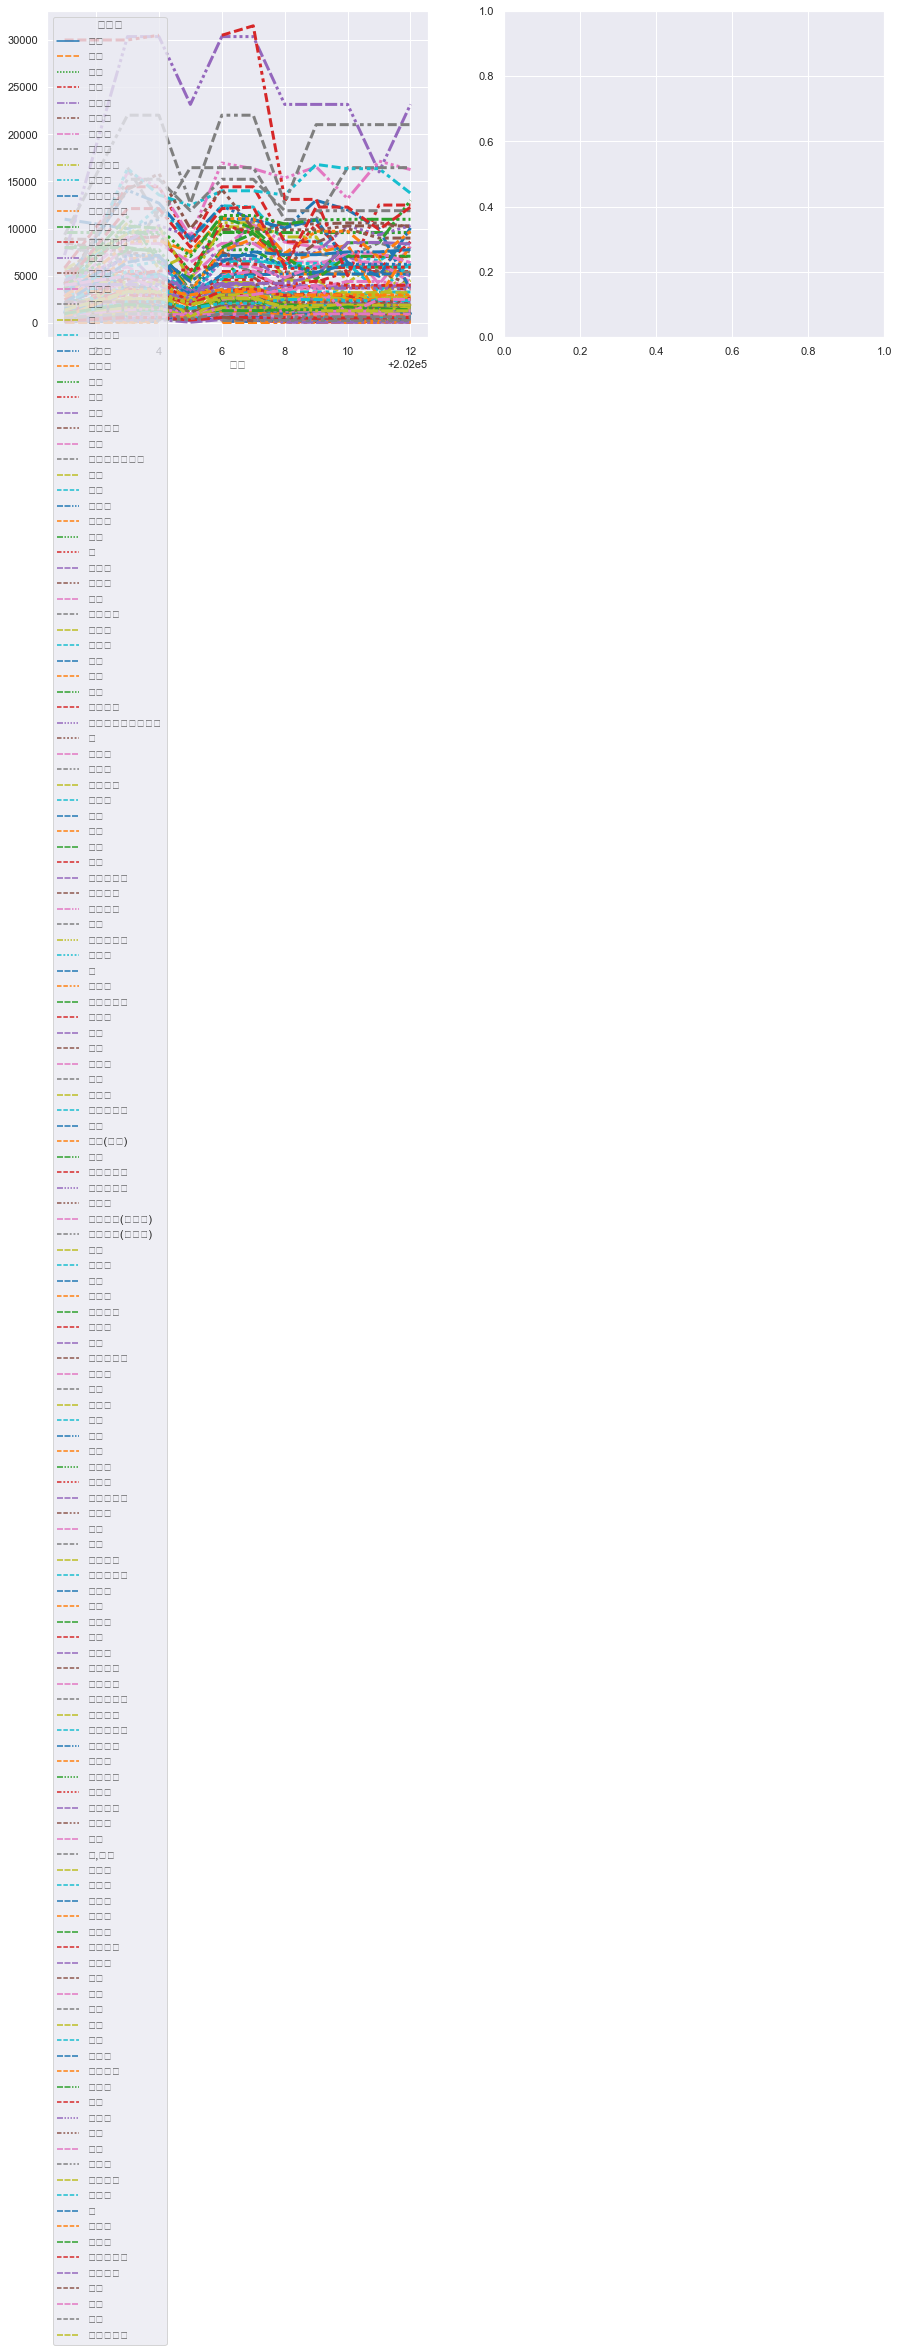

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15, 6)})


Month_data=pd.pivot_table(total_price, index = "날짜", columns = "소분류", 
                                   values ="단위가격" ,aggfunc = "sum")

fig, ax = plt.subplots(1,2)
sns.lineplot(data =Month_data, palette = "tab10", linewidth = 3, ax = ax[0]).set_title("")
#sns.lineplot(data =FranClass_YM_TS_data, palette = "tab10", linewidth = 3, ax = ax[1]).set_title("")
plt.show()